<a href="https://colab.research.google.com/github/rachelhostetler/ABCAtlas_UseCases/blob/main/Plotting_aging_DE_genes_in_cell_subsets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allen Brain Cell Atlas Use Case
This notebook is an example of how to use data from the Allen Brain Cell (ABC) Atas. Code for this notebook comes from [ABC Atlas Access](https://alleninstitute.github.io/abc_atlas_access/intro.html), which features in depth tutorials on ABC Atlas scRNAseq and MERFISH datasets. Use ABC Atlas Access to learn more about each of the datasets. The text following '#' are comments and/or indicate where the code can be edited to look at different brain regions, cell types, etc. This notebook is intended to be used in Google Colab.
## Use Case Description
A scientist studies the affects of aging on oligodendrocytes in mice. They are using the dataset "10x-scRNAseq-aged-adult" in the ABC Atlas and want to find out the top 2 aging-related differentially expressed genes in the 1179 OPC NN_1, 1181 COP NN_1, 1183 MFOL NN_3, and 1184 MOL NN_4 supertypes. [Here](https://knowledge.brain-map.org/abcatlas#AQEBVllHT0FIOUNaSE5ORFZHRk5DSAACNllTTlU5NFExMTlCTkU2TzdYRgADBAFGUzAwRFhWMFQ5UjFYOUZKNFFFAAIAAAFRWTVTOEtNTzVITEpVRjBQMDBLAAIAAAExNUJLNDdEQ0lPRjFTTExVVzlQAAIEMTE3OSBPUEMgTk5fMQAxMTgxIENPUCBOTl8xADExODMgTUZPTCBOTl8zADExODQgTU9MIE5OXzQAAAFZODhKQlE1M043V0JYUVQxTlRVAAIAAAQBAQKA9I5fgR5zAgOEVhSFhBQRHAAFAAYBAQIxNUJLNDdEQ0lPRjFTTExVVzlQAAN%2BAAAABAAACDlGREI3RFdRWkVRVFVXRTdKMzAACU45V0pSWEFQS09BT043NFQyOVcACgALAW5vbmUAAm5vbmUAAwEEAQACIzAwMDAwMAADyAEABQEBAiMwMDAwMDAAA8gBAAAAAgEA) are the cells they are studying in the ABC Atlas.

Goal: plot top 2 aging-related differentially expressed genes in 1179 OPC NN_1, 1181 COP NN_1, 1183 MFOL NN_3, and 1184 MOL NN_4 supertypes.

In [2]:
# Install s3fs package
!apt install s3fs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  s3fs
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 297 kB of archives.
After this operation, 794 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 s3fs amd64 1.90-1 [297 kB]
Fetched 297 kB in 1s (438 kB/s)
Selecting previously unselected package s3fs.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../archives/s3fs_1.90-1_amd64.deb ...
Unpacking s3fs (1.90-1) ...
Setting up s3fs (1.90-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [3]:
# Make directory to mount s3 data into
!mkdir -p /data/abc_atlas

In [4]:
# Mount the s3 bucket using s3fs-fuse
!s3fs -o public_bucket=1 -o default_acl=public-read -o endpoint="us-west-2" allen-brain-cell-atlas /data/abc_atlas

In [5]:
# Check that it's mounted
!ls -ltrh /data/abc_atlas

total 35K
drwxr-x--- 1 root root   0 Dec 31  1969 releases
drwxr-x--- 1 root root   0 Dec 31  1969 metadata
drwxr-x--- 1 root root   0 Dec 31  1969 mapmycells
drwxr-x--- 1 root root   0 Dec 31  1969 image_volumes
drwxr-x--- 1 root root   0 Dec 31  1969 expression_matrices
-rw-r----- 1 root root 32K Jun  7  2023 index.html


In [6]:
# Install abc_atlas_access
%pip install "abc_atlas_access[notebooks] @ git+https://github.com/alleninstitute/abc_atlas_access.git"

  Cloning https://github.com/alleninstitute/abc_atlas_access.git to /tmp/pip-install-65sx8rns/abc-atlas-access_f691b87c474c4629b440697e1bb7cfdc
  Running command git clone --filter=blob:none --quiet https://github.com/alleninstitute/abc_atlas_access.git /tmp/pip-install-65sx8rns/abc-atlas-access_f691b87c474c4629b440697e1bb7cfdc
  Resolved https://github.com/alleninstitute/abc_atlas_access.git to commit a82a6770c99ad166105c3e6fccd47f31ee69b44c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 77.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [7]:
from pathlib import Path
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [8]:
download_base = Path('/data/abc_atlas')
abc_cache = AbcProjectCache.from_local_cache(download_base)

abc_cache.current_manifest

/usr/local/lib/python3.11/dist-packages/abc_atlas_access/abc_atlas_cache/cloud_cache.py:470: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. Unless running as a LocalCache, files will be re-downloaded.
  warnings.warn(msg, MissingLocalManifestWarning)
/usr/local/lib/python3.11/dist-packages/abc_atlas_access/abc_atlas_cache/cloud_cache.py:1373: ReadOnlyLocalCacheWarning: LocalCache is a read only directory and cannot
                save the last used manifest.
                Current Manifest: releases/20250531/manifest.json
  warnings.warn(


'releases/20250531/manifest.json'

In [9]:
abc_cache.list_directories

['ASAP-PMDBS-10X',
 'ASAP-PMDBS-taxonomy',
 'Allen-CCF-2020',
 'HMBA-10xMultiome-BG',
 'HMBA-10xMultiome-BG-Aligned',
 'HMBA-BG-taxonomy-CCN20250428',
 'MERFISH-C57BL6J-638850',
 'MERFISH-C57BL6J-638850-CCF',
 'MERFISH-C57BL6J-638850-imputed',
 'MERFISH-C57BL6J-638850-sections',
 'SEAAD',
 'SEAAD-taxonomy',
 'WHB-10Xv3',
 'WHB-taxonomy',
 'WMB-10X',
 'WMB-10XMulti',
 'WMB-10Xv2',
 'WMB-10Xv3',
 'WMB-neighborhoods',
 'WMB-taxonomy',
 'Zeng-Aging-Mouse-10Xv3',
 'Zeng-Aging-Mouse-WMB-taxonomy',
 'Zhuang-ABCA-1',
 'Zhuang-ABCA-1-CCF',
 'Zhuang-ABCA-2',
 'Zhuang-ABCA-2-CCF',
 'Zhuang-ABCA-3',
 'Zhuang-ABCA-3-CCF',
 'Zhuang-ABCA-4',
 'Zhuang-ABCA-4-CCF']

In [10]:
import pandas as pd
import numpy as np
import anndata
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from typing import Optional, Tuple

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [11]:
# Load the cell metadata of aging mouse taxonomy and show first 5 cells in table
cell = abc_cache.get_metadata_dataframe(
    directory='Zeng-Aging-Mouse-10Xv3',
    file_name='cell_metadata',
    dtype={'cell_label': str,
           'wmb_cluster_alias': 'Int64'}
)
cell.set_index('cell_label', inplace=True)

cell_colors = abc_cache.get_metadata_dataframe(
    directory='Zeng-Aging-Mouse-10Xv3',
    file_name='cell_annotation_colors'
).set_index('cell_label')

cluster_info = abc_cache.get_metadata_dataframe(
    directory='Zeng-Aging-Mouse-10Xv3',
    file_name='cluster'
).set_index('cluster_alias')

cell_cluster_mapping = abc_cache.get_metadata_dataframe(
    directory='Zeng-Aging-Mouse-WMB-taxonomy',
    file_name='cell_cluster_mapping_annotations'
).set_index('cell_label')
cell_cluster_mapping.head()

# Join on the cell_label index.
cell_extended = cell.join(cell_cluster_mapping, rsuffix='_cl_map')
cell_extended = cell_extended.join(cell_colors, rsuffix='_cl_colors')
# Join the cluster information in by joining on the Aging dataset's cluster_alias column.
cell_extended = cell_extended.join(cluster_info, on='cluster_alias', rsuffix='_cl_info')

# Quick run through to drop duplicated columns
drop_cols = []
for col in cell_extended.columns:
    if col.endswith(('_cl_map', '_cl_colors', '_cl_info')):
        drop_cols.append(col)
cell_extended.drop(columns=drop_cols, inplace=True)

# The dataset is sorted on cell_label by default, this causes some plotting weirdness
# due to all "adult" cells being first in the order. Below we scrabble the DataFrame
# to better reproduce plots from the paper.
cell_extended = cell_extended.sample(frac=1, random_state=12345)

del cell
del cell_colors
del cell_cluster_mapping
del cluster_info

cell_extended.head()

,cell_barcode,gene_count,umi_count,doublet_score,x,y,cluster_alias,cell_in_wmb_study,wmb_cluster_alias,library_label,...,proportion_adult_cells,proportion_aged_cells,odds_ratio,log2_odds_ratio,cluster_age_bias,max_region_of_interest_color,cluster_age_bias_color,neurotransmitter_combined_label,neurotransmitter_label,neurotransmitter_color
cell_label,,,,,,,,,,,,,,,,,,,,,
GCCTGTTGTGAATTAG-135_B01,GCCTGTTGTGAATTAG,6777,37834.0,0.200000,-1.185296,1.881103,278,True,1079,L8TX_190716_01_D07,...,0.577949,0.422051,1.013716,0.019653,unassigned,#80CDF8,#DADEDF,GABA,GABA,#FF3358
TCCGAAAGTGAAGCGT-761_A04,TCCGAAAGTGAAGCGT,3396,9585.0,0.030303,14.007499,-0.220336,817,False,<NA>,L8TX_210805_01_H01,...,0.454494,0.545506,1.046448,0.065500,unassigned,#8599CC,#DADEDF,No-NT,No-NT,#666666
TTACCATGTCGTGGTC-327_A06,TTACCATGTCGTGGTC,4294,10527.0,0.020000,6.550781,-1.378886,804,False,<NA>,L8TX_200813_01_H10,...,0.370570,0.629430,1.741208,0.800089,unassigned,#80C0E2,#DADEDF,No-NT,No-NT,#666666
ACGGGTCGTACGAGCA-385_D06,ACGGGTCGTACGAGCA,2943,6957.0,0.000000,13.650183,0.289086,817,False,<NA>,L8TX_201008_01_A12,...,0.454494,0.545506,1.046448,0.065500,unassigned,#8599CC,#DADEDF,No-NT,No-NT,#666666
CTTAGGATCTGTCCCA-301_B04,CTTAGGATCTGTCCCA,7907,47406.0,0.037037,6.583878,-10.639808,152,False,<NA>,L8TX_200723_01_B10,...,0.403409,0.596591,0.587232,-0.767999,unassigned,#72D569,#DADEDF,Glut,Glut,#2B93DF


In [12]:
# load differentially expressed genes and show first 5 in table
degenes = abc_cache.get_metadata_dataframe(
    directory='Zeng-Aging-Mouse-WMB-taxonomy',
    file_name='aging_degenes'
)
degenes.head()

,grouping_type,grouping_label,grouping_name,gene_identifier,gene_symbol,is_primary_ieg,age_effect_size,unadjusted_pvalue,adjusted_pvalue,confidence_interval_higher_bound,confidence_interval_lower_bound
0,subclass,CS20230722_SUBC_100,100 AHN Onecut3 Gaba,ENSMUSG00000073590,3222401L13Rik,False,1.812935,7.766049e-12,9.653199e-08,2.346020,1.279850
1,subclass,CS20230722_SUBC_100,100 AHN Onecut3 Gaba,ENSMUSG00000095041,AC149090.1,False,1.289552,3.322308e-17,4.129629e-13,1.793447,0.785656
2,subclass,CS20230722_SUBC_100,100 AHN Onecut3 Gaba,ENSMUSG00000086503,Xist,False,1.185049,2.222176e-11,2.762165e-07,1.645855,0.724244
3,subclass,CS20230722_SUBC_132,132 AHN-RCH-LHA Otp Fezf1 Glut,ENSMUSG00000073590,3222401L13Rik,False,1.867499,1.532389e-15,1.963297e-11,2.366093,1.368905
4,subclass,CS20230722_SUBC_132,132 AHN-RCH-LHA Otp Fezf1 Glut,ENSMUSG00000095041,AC149090.1,False,1.229435,4.989205e-25,6.392170e-21,1.589657,0.869213


In [13]:
# load top differentially expressed genes by sorting by smallest adjusted p-value
def top_ageDE_genes(
    degene_df: pd.DataFrame,
    level: Optional[str]=None,
    top_n: int=3
):
    if level is None:
        level_degenes = degene_df
    else:
        level_degenes = degene_df[degene_df['grouping_type'] == level]

    output_df = []
    celltypes = level_degenes['grouping_name'].unique()
    for celltype in celltypes:
        subdf = degenes[degenes['grouping_name'] == celltype].sort_values(by='adjusted_pvalue')
        if len(subdf) < top_n:
            output_df.append(subdf)
        else:
            output_df.append(subdf[:top_n])
    return pd.concat(output_df).reset_index(drop=True)

In [14]:
# filter top differentially expressed genes per cell type
top_ageDE = top_ageDE_genes(degene_df=degenes, level='supertype', top_n=2)
# 'supertype' edit here to get different taxonomy levels, e.g, 'subclass.' '2' edit here to change number of DE genes per cell type

In [15]:
# show top differentially expressed genes per choosen cell type
celltype = ['1179 OPC NN_1', '1181 COP NN_1', '1183 MFOL NN_3', '1184 MOL NN_4'] # edit cell types here, supertypes are shown
filtered_top_ageDE = top_ageDE[top_ageDE['grouping_name'].isin(celltype)]
filtered_top_ageDE

,grouping_type,grouping_label,grouping_name,gene_identifier,gene_symbol,is_primary_ieg,age_effect_size,unadjusted_pvalue,adjusted_pvalue,confidence_interval_higher_bound,confidence_interval_lower_bound
16,supertype,CS20230722_SUPT_1181,1181 COP NN_1,ENSMUSG00000063972,Nr6a1,False,2.397065,4.385290e-120,4.532635e-116,2.614329,2.179801
17,supertype,CS20230722_SUPT_1181,1181 COP NN_1,ENSMUSG00000051242,Pcdhb9,False,1.601236,5.378247e-53,5.558956e-49,1.816924,1.385548
22,supertype,CS20230722_SUPT_1183,1183 MFOL NN_3,ENSMUSG00000026879,Gsn,False,-1.941323,3.753613e-29,3.844075e-25,-1.449836,-2.432810
23,supertype,CS20230722_SUPT_1183,1183 MFOL NN_3,ENSMUSG00000022797,Tfrc,False,-2.542936,4.837865e-19,4.954457e-15,-2.053125,-3.032746
26,supertype,CS20230722_SUPT_1184,1184 MOL NN_4,ENSMUSG00000058135,Gstm1,False,3.717956,0.000000e+00,0.000000e+00,3.934791,3.501120
27,supertype,CS20230722_SUPT_1184,1184 MOL NN_4,ENSMUSG00000041828,Abca8a,False,3.658591,7.562081e-302,7.168852e-298,3.884402,3.432779
28,supertype,CS20230722_SUPT_1179,1179 OPC NN_1,ENSMUSG00000063972,Nr6a1,False,2.715928,1.249425e-141,1.327889e-137,2.934481,2.497374
29,supertype,CS20230722_SUPT_1179,1179 OPC NN_1,ENSMUSG00000022123,Scel,False,2.674891,1.570188e-118,1.668796e-114,2.890526,2.459255


In [23]:
# save above table as csv. saved file will appear in 'files' tab on the left sidebar
filtered_top_ageDE.to_csv('filtered_top_ageDE.csv')

In [17]:
# list top differentially expressed genes per cell type from table
print(filtered_top_ageDE['gene_symbol'].unique())

['Nr6a1' 'Pcdhb9' 'Gsn' 'Tfrc' 'Gstm1' 'Abca8a' 'Scel']


In [18]:
genelist = ['Scel', 'Nr6a1', 'Pcdhb9', 'Gsn', 'Tfrc', 'Gstm1', 'Abca8a']
# edit genes from line above here

In [19]:
def get_genes_for_celltype_level(
    degene_df: pd.DataFrame,
    level: str,
    degene_list: list[str],
):
    level_degenes = degene_df[degene_df['grouping_type'] == level]
    levels = sorted(level_degenes['grouping_name'].unique())
    level_by_gene = pd.DataFrame(columns=degene_list, index=levels)
    for idx, derow in level_degenes.iterrows():
        if derow['gene_symbol'] in degene_list:
            level_by_gene.loc[derow['grouping_name'], derow['gene_symbol']] = derow['age_effect_size']
    return level_by_gene

In [20]:
celltype_by_gene = get_genes_for_celltype_level(
    degene_df=filtered_top_ageDE,
    level='supertype',
    degene_list=genelist )
# change cell type level here, 'supertype' is shown

In [21]:
# plot heatmap of age_effect_size of top differntially expressed genes per chosen cell types
def plot_heatmap(df, fig_width=8, fig_height=4, cmap=plt.cm.magma_r, vmin=None, vmax=None) :

    arr = df.to_numpy().astype('float')

    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)

    im = ax.imshow(arr, cmap=cmap, aspect='auto', vmin=vmin, vmax=vmax)
    xlabs = df.columns.values
    ylabs = df.index.values

    ax.set_xticks(range(len(xlabs)))
    ax.set_xticklabels(xlabs)

    ax.set_yticks(range(len(ylabs)))
    res = ax.set_yticklabels(ylabs)

    return im

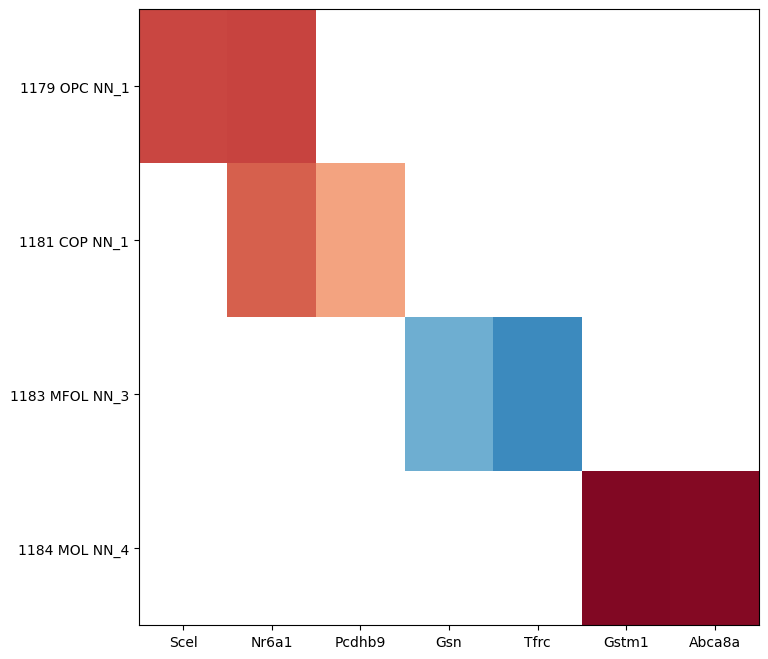

In [22]:
# show plot
res = plot_heatmap(celltype_by_gene, 8, 8, cmap=plt.cm.RdBu_r, vmin=-4, vmax=4) # edit size of plot here
plt.show()